In [0]:
%sql
use unirdat.pubmed_db;



+--------+----------------------------------------------------------------------------------------------------------------------------------------------+------------+----------------------------------------------------------------------+------------------+------------+
|pmid    |title                                                                                                                                         |pub_year_for|journal                                                               |country_normalized|language_iso|
+--------+----------------------------------------------------------------------------------------------------------------------------------------------+------------+----------------------------------------------------------------------+------------------+------------+
|32627303|engineering hepg2 spheroids with injectable fiber fragments as predictable models for drug metabolism and tumor infiltration.                 |2020        |journal of biomedical ma

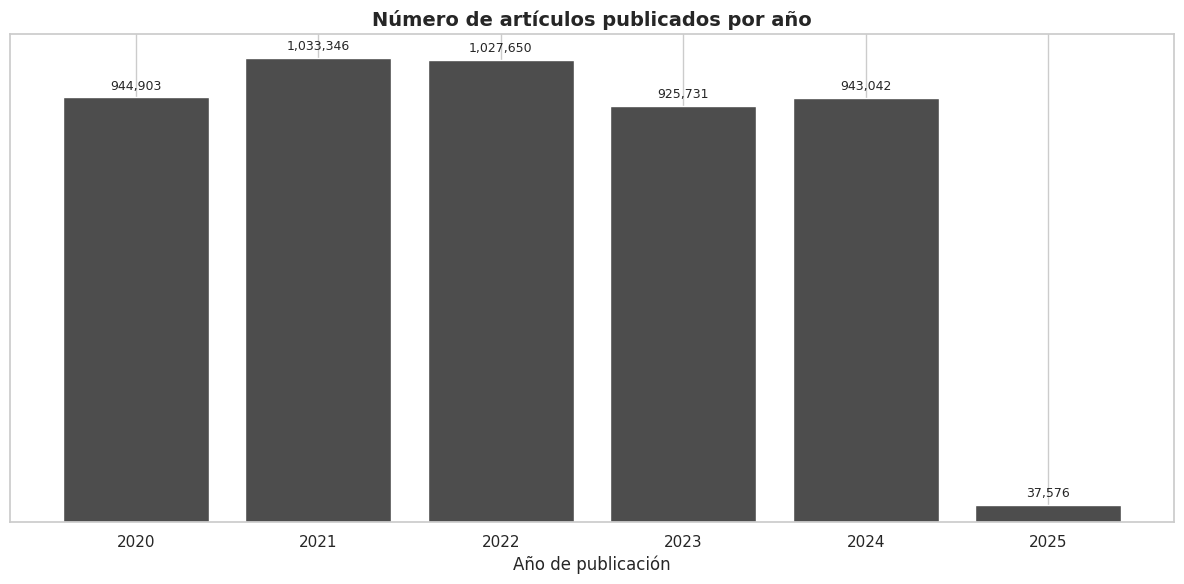

                                             journal  count
9                                          nutrients  23098
8                              nature communications  26602
7  environmental science and pollution research i...  27295
6                            frontiers in immunology  28914
5                     molecules (basel, switzerland)  29379
4               the science of the total environment  29801
3  international journal of environmental researc...  48283
2        international journal of molecular sciences  70120
1                                           plos one  78421
0                                 scientific reports  91676


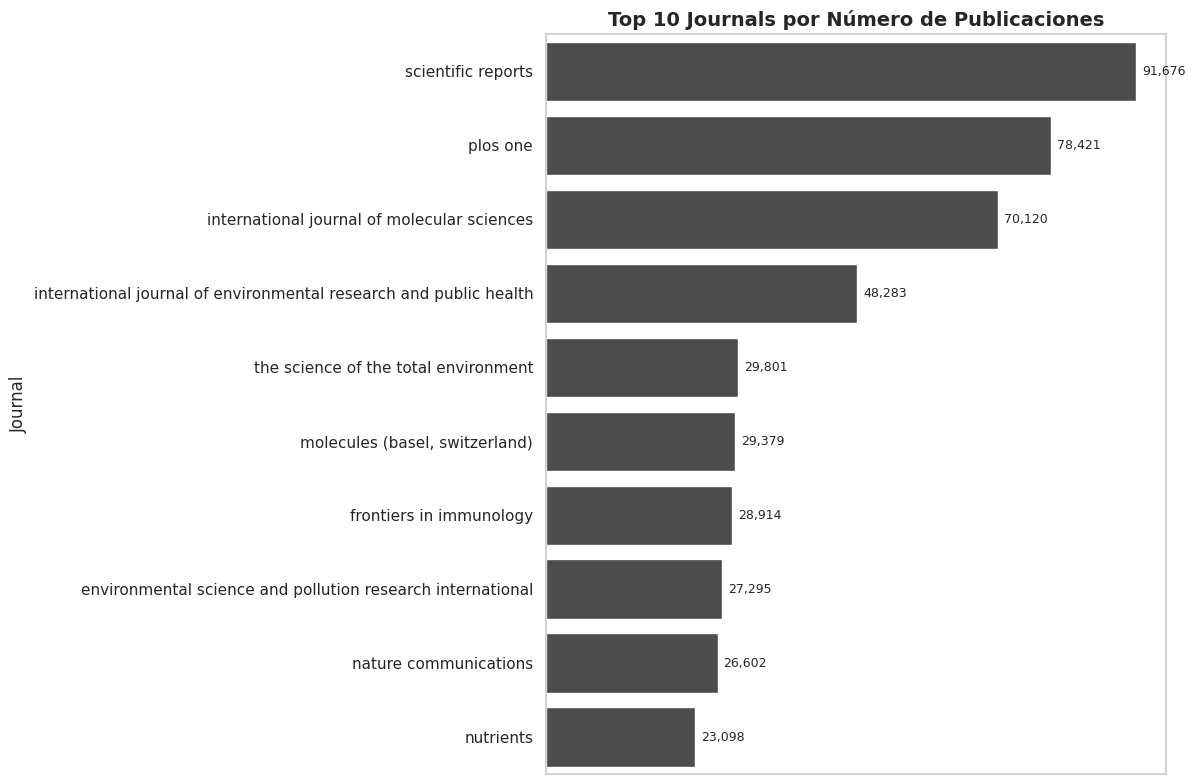

             Name    count
9         Ireland    50280
8       Australia    51598
7           Japan    56149
6          France    59812
5           China    72393
4         Germany   275777
3     Switzerland   379819
2     Netherlands   411862
1  United Kingdom  1426833
0   United States  1719097


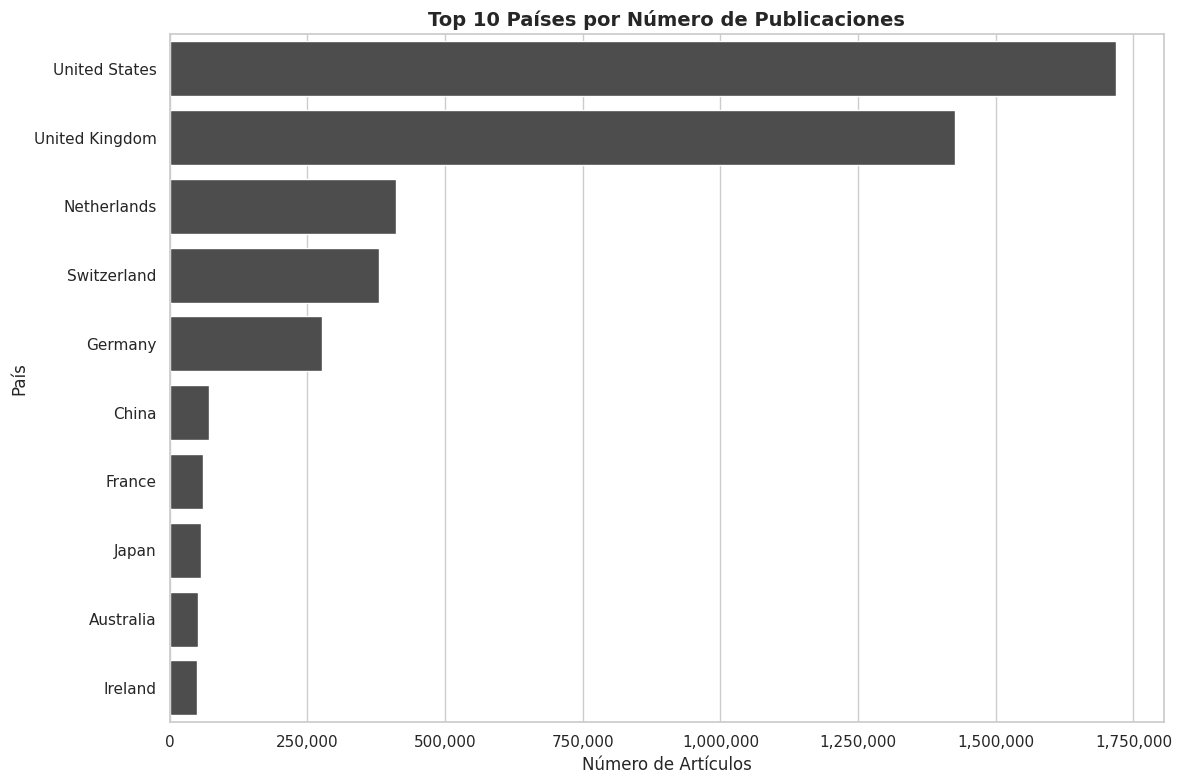

    country_normalized language_iso    count
0                   US           en  1719028
1                   GB           en  1426761
2                   NL           en   410064
3                   CH           en   375638
4                   DE           en   256311
..                 ...          ...      ...
165                 CL           pt        1
166                 CO           fr        1
167                 AU           fr        1
168                 US           pt        1
169                 DK           ro        1

[170 rows x 3 columns]


+--------+--------+---------------+-----+
|pub_year|pmid    |term           |major|
+--------+--------+---------------+-----+
|2021    |33527194|Kidney Diseases|N    |
|2021    |33527235|Animals        |N    |
|2021    |33527253|Pandemics      |N    |
|2021    |33527278|Blood Pressure |N    |
|2021    |34341361|Brazil         |N    |
+--------+--------+---------------+-----+
only showing top 5 rows


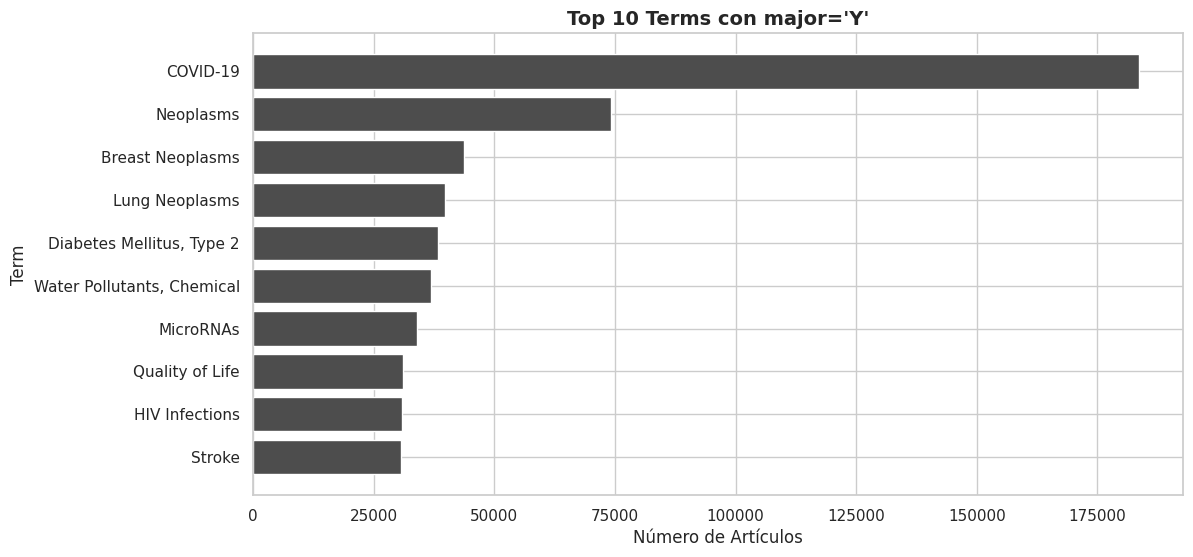

+-------------------+-----------------------+-----------------+---------+-------------------+
|author_id          |fullname               |fore             |last     |orcid              |
+-------------------+-----------------------+-----------------+---------+-------------------+
|0000-0001-5000-717x|josé ernesto vidal     |josé ernesto     |vidal    |0000-0001-5000-717x|
|0000-0001-5000-9810|asnea tariq            |asnea            |tariq    |0000-0001-5000-9810|
|0000-0001-5001-0977|taynara rodrigues ramos|taynara rodrigues|ramos    |0000-0001-5001-0977|
|0000-0001-5001-1013|fanchen wang           |fanchen          |wang     |0000-0001-5001-1013|
|0000-0001-5001-2665|sinead o'riordan       |sinead           |o'riordan|0000-0001-5001-2665|
+-------------------+-----------------------+-----------------+---------+-------------------+
only showing top 5 rows


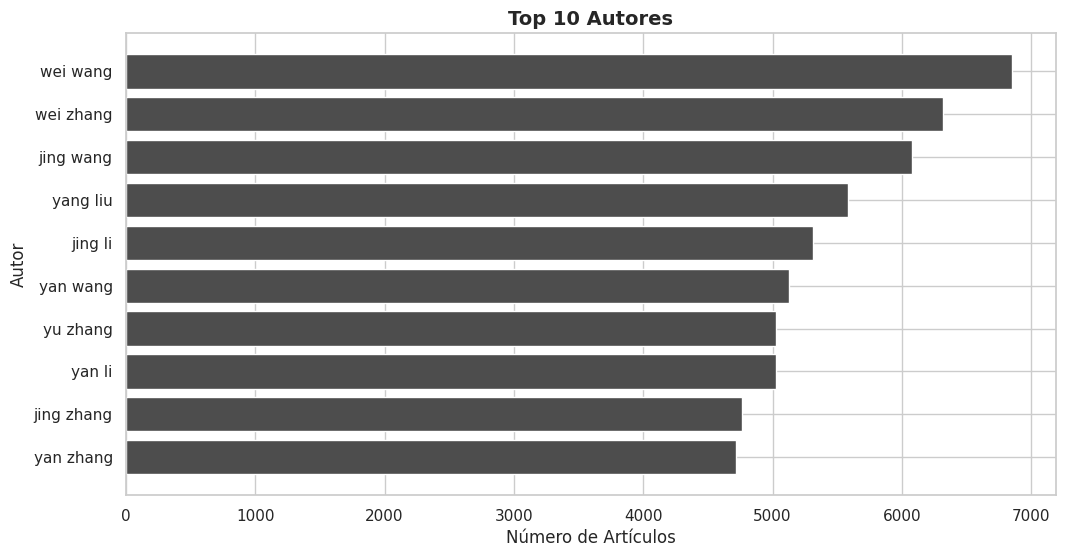

In [0]:
# Databricks notebook source
# MAGIC %md
# ## 🔥 Extensión: Visualizaciones con matplotlib

# ------------------------------------------------------------
# 📊 Importa pandas y matplotlib (ya vienen preinstalados en Databricks)
import pandas as pd
import matplotlib.pyplot as plt

# 👉 Trae la tabla
df = spark.table("unirdat.pubmed_db.m_articulo")
df.cache
df.show(5, truncate=False)

# Revisa el esquema
df.printSchema()

# ------------------------------------------------------------
# 3️⃣ Distribución de años de publicación y revisión

# 👉 Normaliza pub_year: toma solo los 4 primeros caracteres
             
df.cache()

pub_year_df = df.groupBy("pub_year_for").count().orderBy("pub_year_for")
pub_year_pd = pub_year_df.toPandas()

pub_year_pd['pub_year_for'] = pub_year_pd['pub_year_for'].astype(int)
pub_year_pd['count'] = pub_year_pd['count'].astype(int)

# Orden cronológico
pub_year_pd = pub_year_pd.sort_values('pub_year_for')

plt.figure(figsize=(12, 6))

# Barras verticales
bars = plt.bar(
    pub_year_pd['pub_year_for'],
    pub_year_pd['count'],
    color='#4d4d4d',
    zorder=2
)

# 👉 Elimina ticks y etiquetas del eje Y
plt.gca().yaxis.set_ticks([])  # Sin marcas en Y
plt.gca().yaxis.set_ticklabels([])  # Sin etiquetas en Y

# 👉 Etiquetas encima de cada barra
for bar, value in zip(bars, pub_year_pd['count']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        value + max(pub_year_pd['count'])*0.01,
        f"{value:,}",
        ha='center', va='bottom',
        fontsize=9
    )

# Ejes y título
plt.title("Número de artículos publicados por año", fontsize=14, fontweight='bold')
plt.xlabel("Año de publicación", fontsize=12)
plt.ylabel("")  # También puedes quitar el texto del eje Y

# Fondo limpio y rejilla ligera
plt.grid(axis='y', linestyle='--', alpha=0.4, zorder=1)

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 🗂️ 2️⃣ Top journals
# 1️⃣ Agrupar journals
top_journals_df = (
    df.groupBy("journal")
      .count()
      .orderBy("count", ascending=False)
      .limit(10)
)

top_journals_pd = top_journals_df.toPandas()
top_journals_pd = top_journals_pd.sort_values('count', ascending=True)

print(top_journals_pd)

# ---------------------------------------------------------------------
# 2️⃣ Plot Seaborn (un solo color)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    x="count",
    y="journal",
    data=top_journals_pd,
    color="#4d4d4d"
)

plt.title("Top 10 Journals por Número de Publicaciones", fontsize=14, fontweight='bold')
plt.xlabel("")  # 👈 Quita el texto del eje X
plt.ylabel("Journal", fontsize=12)

# Quitar eje X: línea, números y marcas
ax.xaxis.set_visible(False)

# Etiquetas a la derecha de cada barra (opcional, las mantengo)
for index, value in enumerate(top_journals_pd['count']):
    plt.text(
        value + max(top_journals_pd['count']) * 0.01,
        index,
        f"{value:,}",
        va='center',
        ha='left',
        fontsize=9
    )

# Invertir para tener el journal top arriba
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()
# ---------------------------------------------------------------------
# 

# ------------------------------------------------------------
# 🗂️ 3️⃣ Top países
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

 # Join entre df y df_paises por la columna country_normalized
top_countries_df = df.groupBy("country_normalized").count().orderBy("count", ascending=False).limit(20)
df_paises = spark.table("unirdat.pubmed_db.n_pais")

df_joined = df.join(df_paises, df["country_normalized"] == df_paises["code"], how="inner")

# Ahora agrupar por n_pais y contar publicaciones
top_paises_df = (
    df_joined.groupBy("Name")
             .count()
             .orderBy("count", ascending=False)
             .limit(10)
)

top_paises_pd = top_paises_df.toPandas()

# Ordenar para gráfico
top_paises_pd = top_paises_pd.sort_values('count', ascending=True)
print(top_paises_pd)

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    x="count",
    y="Name",
    data=top_paises_pd,
    color="#4d4d4d"
)

plt.title("Top 10 Países por Número de Publicaciones", fontsize=14, fontweight='bold')
plt.xlabel("Número de Artículos", fontsize=12)
plt.ylabel("País", fontsize=12)

# Forzar que aparezcan los ticks en eje X con formato de miles
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 🗂️ 4️⃣ Top idiomas
# --- Paso 1: Agrupar por país e idioma y contar publicaciones ---

#top_lang_df = df.groupBy("language_iso").count().orderBy("count", ascending=False).limit(20)
#top_lang_pd = top_lang_df.toPandas()
#print(top_lang_p
top_pais_lang_df = df.groupBy("country_normalized", "language_iso").count().orderBy("count", ascending=False)

# --- Paso 2: Convertir a Pandas ---
top_pais_lang_pd = top_pais_lang_df.toPandas()
print(top_pais_lang_pd)
# --- Paso 3: Mapear nombres de país a códigos ISO3 ---
import pycountry

def country_to_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

top_pais_lang_pd['iso_alpha'] = top_pais_lang_pd['country_normalized'].apply(country_to_iso3)

# Eliminar filas sin código ISO válido
top_pais_lang_pd = top_pais_lang_pd.dropna(subset=['iso_alpha'])

# --- Paso 4: Crear mapa interactivo con filtro por idioma ---

import plotly.express as px

fig = px.choropleth(
    top_pais_lang_pd,
    locations='iso_alpha',
    color='count',
    hover_name='country_normalized',
    animation_frame='language_iso',  # Para filtro interactivo tipo "slider"
    color_continuous_scale='Purples',
    title='Número de publicaciones por país e idioma',
    labels={'count': 'Número de publicaciones', 'lenguaje': 'Idioma'}
)


fig.update_layout(
    title={
        'text': "Número de publicaciones por país e idioma",
        'font': dict(
            family="Arial Black",   # 👈 Fuente en negrita
            size=14,
            color="black"
        ),
        'x': 0.5,  # Centrar
        'xanchor': 'center'
    },
    coloraxis_colorbar=dict(
        title={
            'text': "Número de publicaciones",
            'font': dict(
            family="Arial Black",   # 👈 Fuente en negrita
            size=14,
            color="black"
        )
        }
    )
)



fig.show()



# Filtrar filas donde major == 'Y'
df_mesh = spark.table("default.pubmed_mesh")
df_mesh.show(5, truncate=False)
top_terms_df = df_mesh.filter(col("major") == "Y") \
    .groupBy("term") \
    .count() \
    .orderBy("count", ascending=False) \
    .limit(10)

# Pasar a pandas para graficar
top_terms_pd = top_terms_df.toPandas()

# Graficar barras horizontales
plt.figure(figsize=(12,6))
plt.barh(top_terms_pd['term'], top_terms_pd['count'], color='#4d4d4d')
plt.title("Top 10 Terms con major='Y'", fontsize=14, fontweight='bold')
plt.xlabel("Número de Artículos")
plt.ylabel("Term")
plt.gca().invert_yaxis()
plt.show()



# Filtrar Autores que mas publican

df_autor = spark.table("unirdat.pubmed_db.m_autor")
df_autor.show(5, truncate=False)
top_autor_df = df_autor\
    .groupBy("fullname") \
    .count() \
    .orderBy("count", ascending=False) \
    .limit(10)

# Pasar a pandas para graficar
top_autor_pd = top_autor_df.toPandas()

# Graficar barras horizontales
plt.figure(figsize=(12,6))
plt.barh(top_autor_pd['fullname'], top_autor_pd['count'], color='#4d4d4d')
plt.title("Top 10 Autores", fontsize=14, fontweight='bold')
plt.xlabel("Número de Artículos")
plt.ylabel("Autor")
plt.gca().invert_yaxis()
plt.show()

+--------------------+------------+-----------+-----------------------+
|      institution_id|pub_year_for|num_authors|affiliation_normalizada|
+--------------------+------------+-----------+-----------------------+
|6258dd56482d33c55...|        2025|         41|   sackler of medici...|
|6258dd56482d33c55...|        2020|       1933|   sackler of medici...|
|6258dd56482d33c55...|        2024|        766|   sackler of medici...|
|6258dd56482d33c55...|        2023|       1767|   sackler of medici...|
|6258dd56482d33c55...|        2022|       2527|   sackler of medici...|
+--------------------+------------+-----------+-----------------------+
only showing top 5 rows


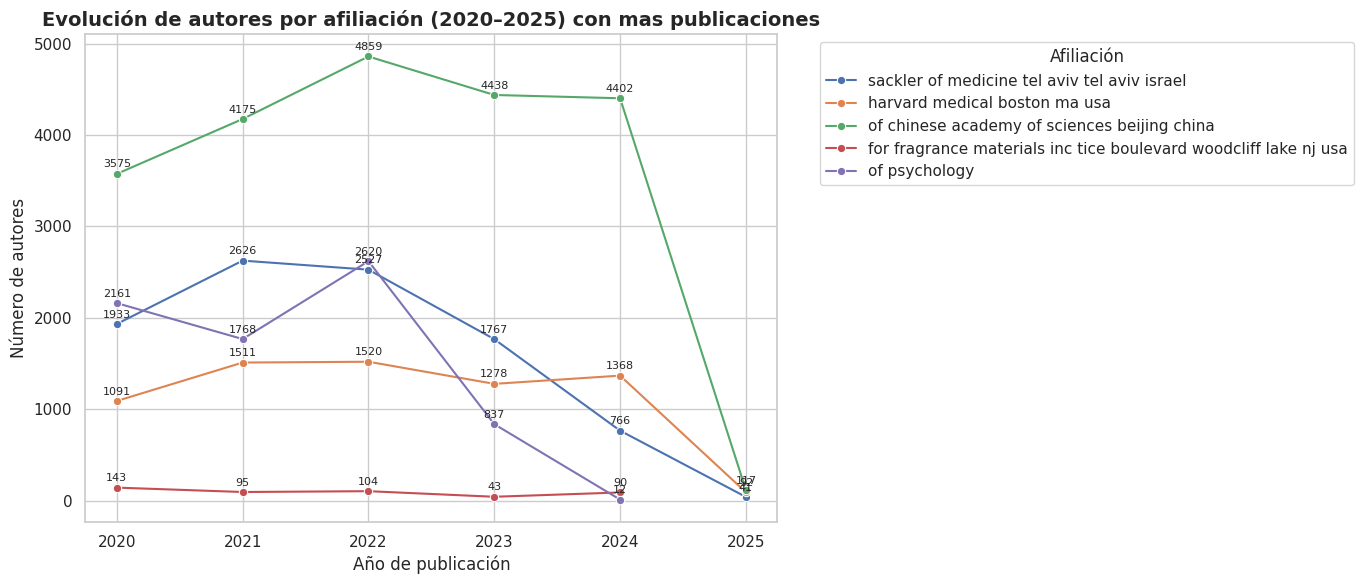

In [0]:
# -----------------------------------------------------------------------------
# 🚩 1️⃣ Librerías
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 🚩 2️⃣ Leer tabla base
df = spark.table("unirdat.pubmed_db.m_articulo_autor_affiliation")



# -----------------------------------------------------------------------------
# 🚩 4️⃣ Agrupar por afiliación + autor + año
df_grouped = (
    df.groupBy("institution_id", "pub_year_for", "author_id")
    .agg(F.count("*").alias("num_publications"))
)

# -----------------------------------------------------------------------------
# 🚩 5️⃣ Calcular total publicaciones por afiliación en el rango 2020–2025
df_total_per_aff = (
    df_grouped.groupBy("institution_id")
    .agg(F.sum("num_publications").alias("total_publications"))
)

# -----------------------------------------------------------------------------
# 🚩 6️⃣ Filtrar Top 5 afiliaciones más productivas
top_affs = (
    df_total_per_aff.orderBy(F.desc("total_publications"))
    .limit(5)
)

# -----------------------------------------------------------------------------
# 🚩 7️⃣ Mantener solo publicaciones de esas afiliaciones
df_top = df_grouped.join(
    top_affs.select("institution_id"),
    on="institution_id",
    how="inner"
)

# -----------------------------------------------------------------------------
# 🚩 8️⃣ Contar autores únicos por afiliación y año
df_authors_per_aff_year = (
    df_top.groupBy("institution_id", "pub_year_for")
    .agg(F.countDistinct("author_id").alias("num_authors"))
    .orderBy("institution_id", "pub_year_for")
)

# -----------------------------------------------------------------------------  
# 🚩 1️⃣ Carga tabla de afiliaciones
df_affiliations = spark.table("unirdat.pubmed_db.m_afiliacion")

# -----------------------------------------------------------------------------  
# 🚩 2️⃣ Haz el JOIN
df_with_names = df_authors_per_aff_year.join(
    df_affiliations.select(
        F.col("institution_id"),
        F.col("affiliation_normalizada")
    ),
    on="institution_id",
    how="inner"
)

df_with_names.show(5)


# -----------------------------------------------------------------------------
# 🚩 9️⃣ Pandas para plot
df_plot = df_with_names.toPandas()

# -----------------------------------------------------------------------------  
# 🚩 Plot
plt.figure(figsize=(14, 6))
sns.set_theme(style="whitegrid")

# Lineplot
ax = sns.lineplot(
    data=df_plot,
    x="pub_year_for",
    y="num_authors",
    hue="affiliation_normalizada",
    marker="o"
)

# Título y ejes
plt.title("Evolución de autores por afiliación (2020–2025) con mas publicaciones", fontsize=14, fontweight='bold')
plt.xlabel("Año de publicación")
plt.ylabel("Número de autores")

# -----------------------------------------------------------------------------  
# 🚩 1️⃣ Mostrar número de autores encima de cada punto
for line in df_plot["affiliation_normalizada"].unique():
    df_line = df_plot[df_plot["affiliation_normalizada"] == line]
    for x, y in zip(df_line["pub_year_for"], df_line["num_authors"]):
        ax.text(x, y + max(df_plot["num_authors"])*0.01, f"{y}", 
                ha='center', va='bottom', fontsize=8)

# -----------------------------------------------------------------------------  
# 🚩 2️⃣ Mover leyenda fuera del gráfico
plt.legend(
    title="Afiliación",
    bbox_to_anchor=(1.05, 1),  # mueve leyenda a la derecha
    loc='upper left'
)

plt.tight_layout()
plt.show()




+----------------+--------+----------------+
|term            |pub_year|num_publications|
+----------------+--------+----------------+
|Breast Neoplasms|2020    |3088            |
|Breast Neoplasms|2021    |5967            |
|Breast Neoplasms|2022    |11360           |
|Breast Neoplasms|2023    |11734           |
|Breast Neoplasms|2024    |11107           |
|Breast Neoplasms|2025    |417             |
|COVID-19        |2020    |3847            |
|COVID-19        |2021    |38881           |
|COVID-19        |2022    |64087           |
|COVID-19        |2023    |47862           |
+----------------+--------+----------------+
only showing top 10 rows


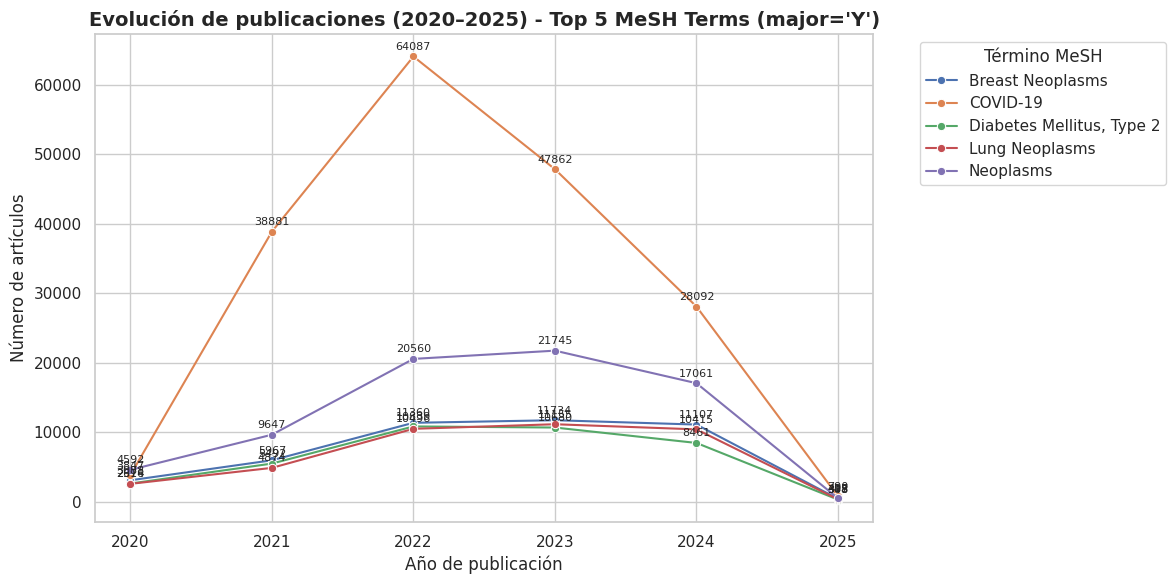

In [0]:
# -----------------------------------------------------------------------------
# 🚩 1️⃣ Librerías
from pyspark.sql.functions import col, count, desc
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 🚩 2️⃣ Leer tabla
df_mesh = spark.table("default.pubmed_mesh")

# -----------------------------------------------------------------------------
# 🚩 3️⃣ Filtrar solo major = 'Y'
df_mesh_filtered = df_mesh.filter(col("major") == "Y")

# -----------------------------------------------------------------------------
# 🚩 4️⃣ Contar publicaciones totales por término
top_terms_df = (
    df_mesh_filtered
    .groupBy("term")
    .agg(count("*").alias("num_publications"))
    .orderBy(desc("num_publications"))
    .limit(5)
)

# -----------------------------------------------------------------------------
# 🚩 5️⃣ Mantener solo los Top 5 términos
df_top_terms = df_mesh_filtered.join(
    top_terms_df.select("term"),
    on="term",
    how="inner"
)

# -----------------------------------------------------------------------------
# 🚩 6️⃣ Contar publicaciones por término y año
df_terms_year = (
    df_top_terms
    .groupBy("term", "pub_year")
    .agg(count("*").alias("num_publications"))
    .orderBy("term", "pub_year")
)

df_terms_year.show(10, truncate=False)

# -----------------------------------------------------------------------------
# 🚩 7️⃣ Pasar a Pandas
df_terms_year_pd = df_terms_year.toPandas()

# -----------------------------------------------------------------------------
# 🚩 8️⃣ Lineplot + etiquetas de valores
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Plot básico
ax = sns.lineplot(
    data=df_terms_year_pd,
    x="pub_year",
    y="num_publications",
    hue="term",
    marker="o"
)

plt.title("Evolución de publicaciones (2020–2025) - Top 5 MeSH Terms (major='Y')",
          fontsize=14, fontweight='bold')
plt.xlabel("Año de publicación")
plt.ylabel("Número de artículos")

# 🔑 Etiquetas de valores encima de cada punto
for term in df_terms_year_pd["term"].unique():
    df_sub = df_terms_year_pd[df_terms_year_pd["term"] == term]
    for x, y in zip(df_sub["pub_year"], df_sub["num_publications"]):
        ax.text(
            x,
            y + max(df_terms_year_pd["num_publications"]) * 0.01,
            str(y),
            ha='center',
            va='bottom',
            fontsize=8
        )

# Leyenda desplazada a la derecha
plt.legend(title="Término MeSH", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



+------------+------------+------------+-----------+----------------+
|pub_year_for|num_articles|num_journals|num_authors|num_affiliations|
+------------+------------+------------+-----------+----------------+
|        2020|      944852|        5122|    5765603|         2634581|
|        2021|     1033284|        5133|    6393115|         2933985|
|        2022|     1027615|        5141|    6412411|         2913648|
|        2023|      925731|        5126|    5997592|         2736349|
|        2024|      943042|        5098|    6304170|         2873465|
|        2025|       37576|        2035|     288268|          157519|
+------------+------------+------------+-----------+----------------+



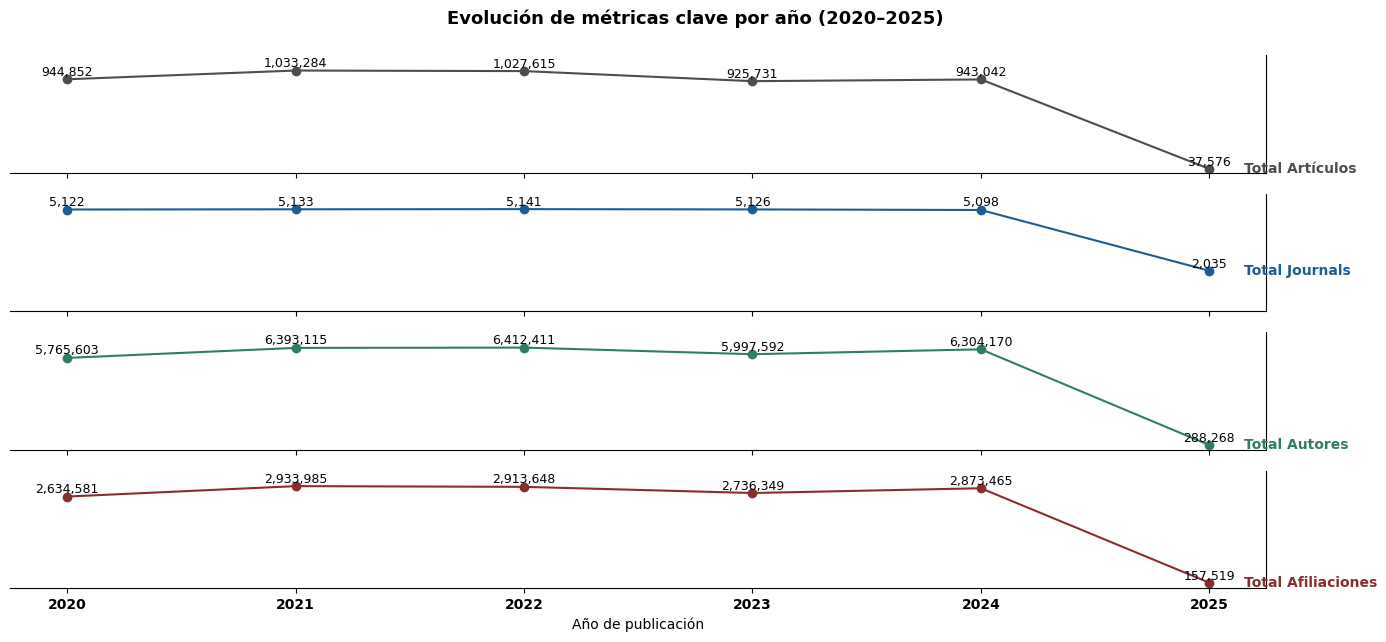

In [0]:
# -----------------------------------------------------------------------------
# 🚩 1️⃣ Librerías
from pyspark.sql import functions as F
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 🚩 2️⃣ Leer tablas
df_articles = spark.table("unirdat.pubmed_db.m_articulo")
df_authors = spark.table("unirdat.pubmed_db.m_articulo_autor_affiliation")



# -----------------------------------------------------------------------------
# 🚩 4️⃣ Agregar métricas por año
# 4.1 Total artículos y journals distintos
agg_articles = (
    df_articles.groupBy("pub_year_for")
    .agg(
        F.countDistinct("pmid").alias("num_articles"),
        F.countDistinct("journal").alias("num_journals")
    )
)

# 4.2 Total autores y afiliaciones distintas
agg_authors = (
    df_authors.groupBy("pub_year_for")
    .agg(
        F.countDistinct("author_id").alias("num_authors"),
        F.countDistinct("institution_id").alias("num_affiliations")
    )
)

# -----------------------------------------------------------------------------
# 🚩 5️⃣ Unir métricas por año
df_metrics = (
    agg_articles.join(agg_authors, on="pub_year_for", how="inner")
    .orderBy("pub_year_for")
)

df_metrics.show()

# -----------------------------------------------------------------------------
# 🚩 6️⃣ Pasar a Pandas
df_metrics_pd = df_metrics.toPandas()

# -----------------------------------------------------------------------------
# 🚩 7️⃣ Plot: barras agrupadas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import math


years = df_metrics_pd["pub_year_for"]
padding_factor = 0.008

fig, axs = plt.subplots(4, 1, figsize=(14, 6.5), sharex=True)

def plot_metric(ax, x, y, color, title):
    ax.plot(x, y, marker="o", color=color)
    ax.set_title("", fontsize=10, fontweight="bold", pad=4)

    # 🚫 Eje Y
    ax.set_ylabel("")
    ax.set_yticklabels([])
    ax.yaxis.set_ticks_position('none')
    ax.spines['left'].set_visible(False)

    # Números encima
    for i, v in enumerate(y):
        ax.text(
            x.iloc[i], v + v * padding_factor, f"{v:,}",
            fontsize=9, ha="center", va="bottom"
        )

    # Etiqueta directa al final de la línea
    ax.text(
        x.iloc[-1] + 0.15, y.iloc[-1],
        title, fontsize=10, fontweight='bold',
        color=color, va="center"
    )

    # Escalado Y limpio
    y_max = max(y) * 1.15
    y_step = math.ceil(y_max / 4)
    y_max_round = y_step * 4
    ax.set_ylim(0, y_max_round)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
    ax.spines['top'].set_visible(False)

# Subplots
plot_metric(axs[0], years, df_metrics_pd["num_articles"], "#4d4d4d", "Total Artículos")
plot_metric(axs[1], years, df_metrics_pd["num_journals"], "#1c5d99", "Total Journals")
plot_metric(axs[2], years, df_metrics_pd["num_authors"], "#2f7f5f", "Total Autores")
plot_metric(axs[3], years, df_metrics_pd["num_affiliations"], "#8c2d2d", "Total Afiliaciones")

axs[3].set_xlabel("Año de publicación", fontsize=10)

plt.xticks(fontweight='bold')

plt.suptitle(
    "Evolución de métricas clave por año (2020–2025)",
    fontsize=13, fontweight='bold',
    y=0.97
)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.subplots_adjust(top=0.9, bottom=0.08, hspace=0.18)

plt.show()





